In [ ]:
import heapq
import matplotlib.pyplot as plt
import matplotlib.patches as paches
import numpy as np
from matplotlib import colors

 Menu De Busca A* e Gulosa Em Labirintos

 Config labirinto
1. Labirinto Aleatório
2. Labirinto Fixo

Escolha entre as opçoes 1 - 2 1
Densidade de obstáculos 0.1-0.4 0.3
 Labirinto aleatório criado!

 labirinto inicial


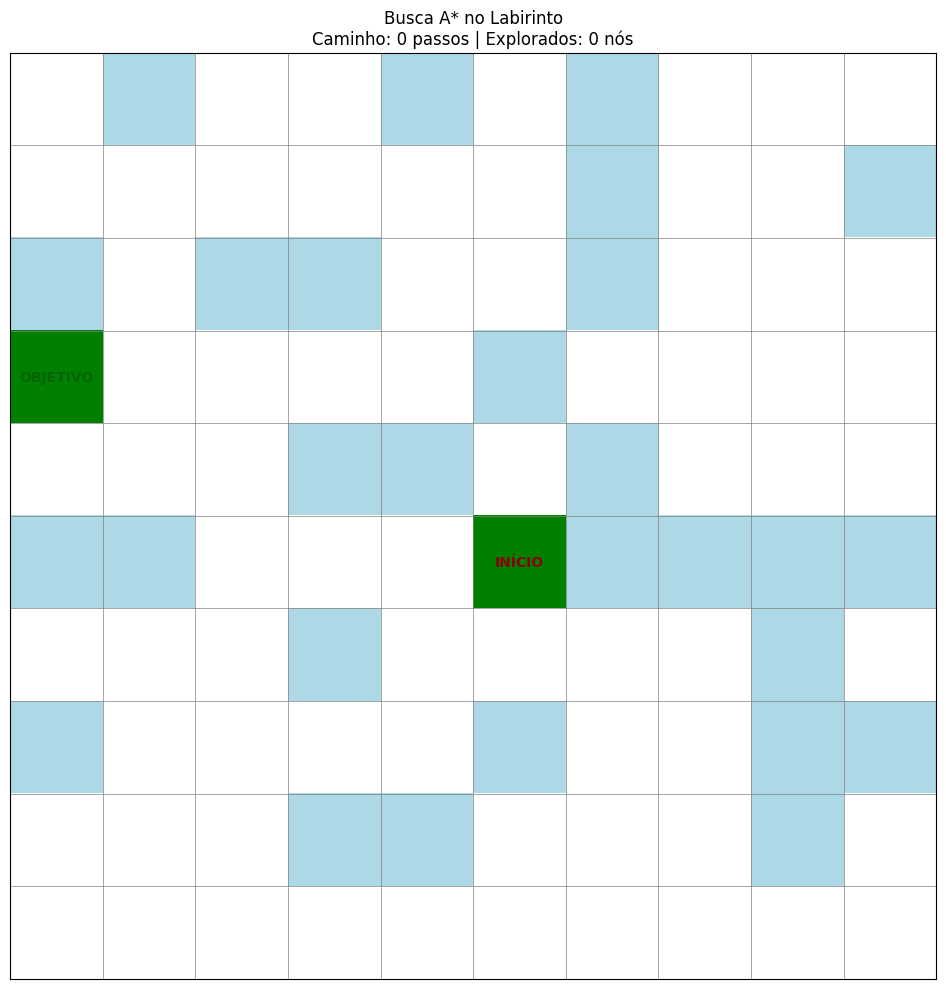


 executando busca A*
Caminho A* encontrado
Início: (5, 5)
Objetivo: (3, 0)
Passos: 8
Nós explorados: 9

 executando busca Gulosa
Caminho Gulosa encontrado
Passos: 8
Nós explorados: 9

 -RESULTADOS-

Resultado A*:


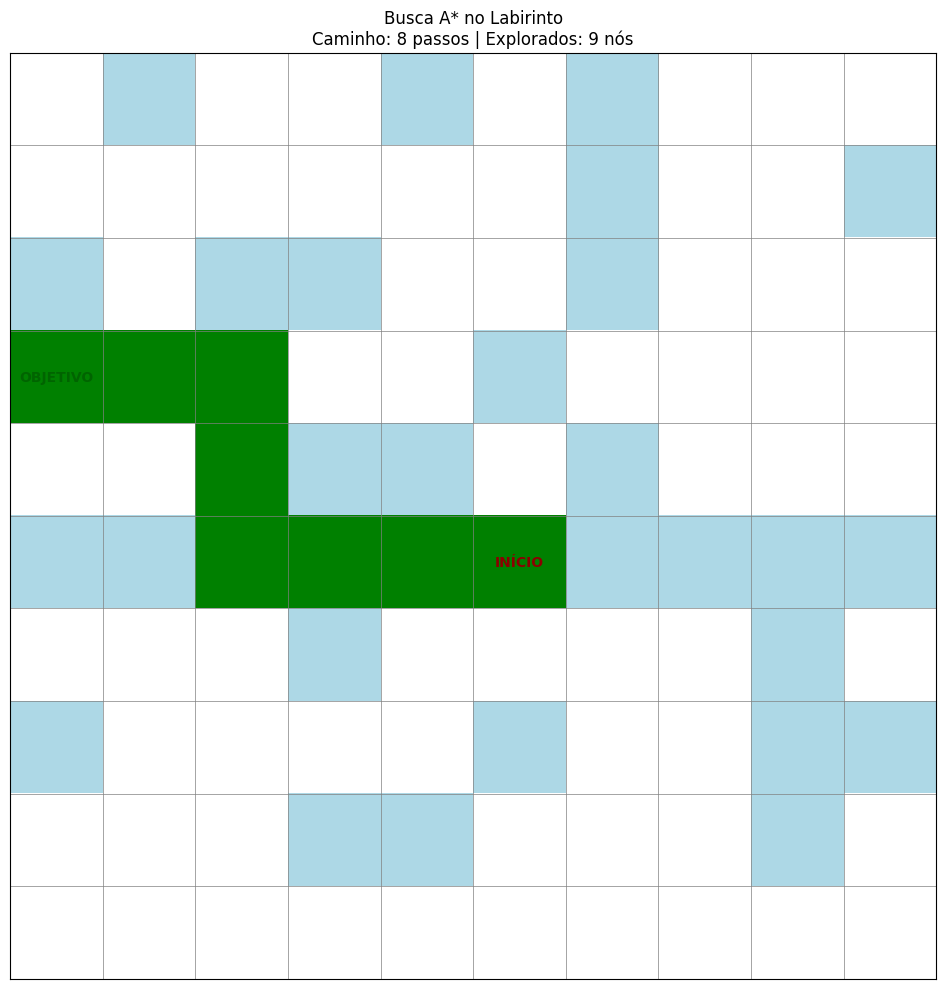


Resultado Busca Gulosa:


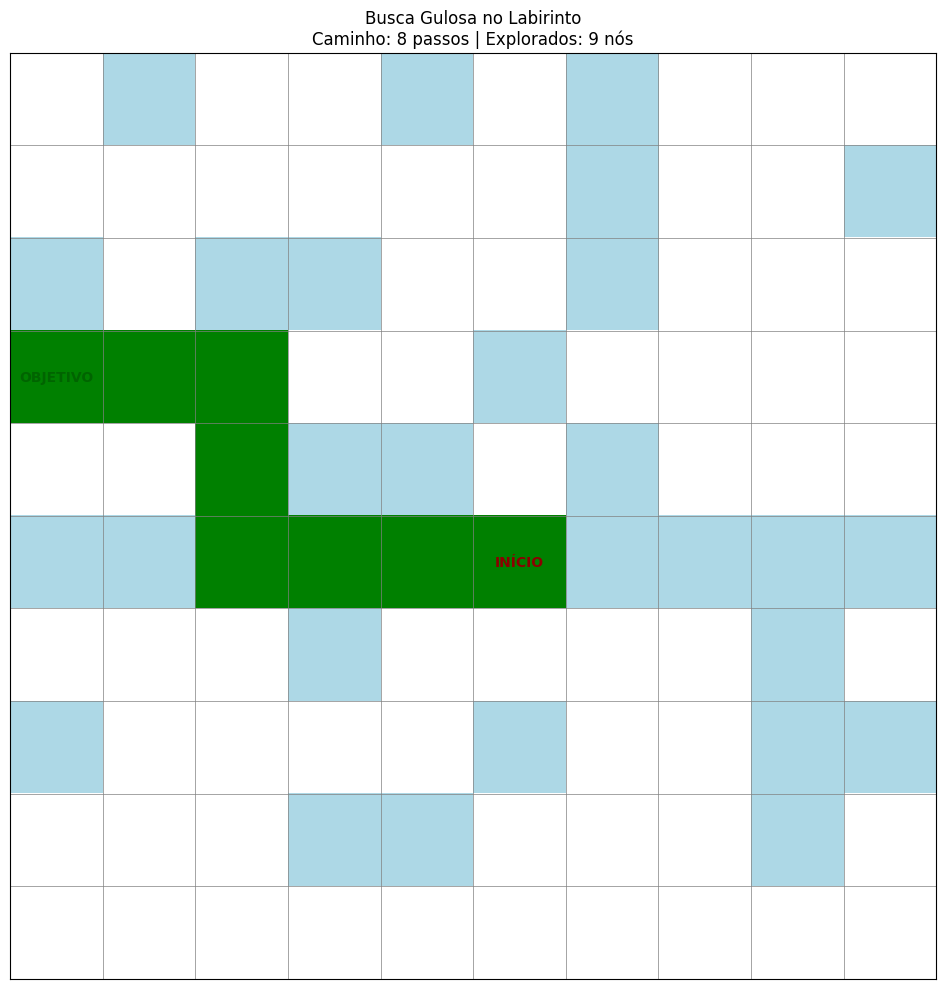

Comparando A* com a busca gulosa
--------------------------------------------------
A*
Custo do caminho: 7
Nós explorados: 9
Caminho encontrado: Sim

Busca Gulosa
Custo do caminho: 7
Nós explorados: 9
Caminho encontrado: Sim

ANÁLISE COMPARATIVA:
Ambos encontraram caminhos com o mesmo custo
Ambos exploraram a mesma quantidade de nós
A*: f(n) = g(n) + h(n) | Busca Gulosa:f(n) = h(n)

ANÁLISE 

Métricas de desempenho A*:
Eficiência de exploração: 9.0%
Comprimento do caminho: 8
Custo total: 7

Métricas de desempenho Busca Gulosa:
Comprimento do caminho: 8
Custo total: 7

Testar outro labirinto? s/n :n

 final de demonstração


In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib import colors

class LabirintoAStrela:
    def __init__(self, linha=10, coluna=10):
        self.linha = linha
        self.coluna = coluna
        self.labirinto = None
        self.inicio = None
        self.objetivo = None
        self.caminho = []
        self.nosExplorados = 0
        self.caminho_gulosa = []
        self.nosExplorados_gulosa = 0

    def gerarLabirinto(self, densidadeObstaculos=0.2):
        self.labirinto = np.zeros((self.linha, self.coluna))
        #criação de obstaculos aleatorios com o input do usuario


        numObstaculos = int(self.linha * self.coluna * densidadeObstaculos)
        for _ in range(numObstaculos):
            i, j = np.random.randint(0, self.linha), np.random.randint(0, self.coluna)
            self.labirinto[i, j] = 1
        #definir o ponto de inicio e objetivo em posições diversas aleatorio


        while True:
            self.inicio = (np.random.randint(0, self.linha),
                          np.random.randint(0, self.coluna))
            if self.labirinto[self.inicio[0]][self.inicio[1]] == 0:
                break
        while True:
            self.objetivo = (np.random.randint(0, self.linha),
                            np.random.randint(0, self.coluna))
            if (self.labirinto[self.objetivo[0]][self.objetivo[1]] == 0 and
                    self.objetivo != self.inicio):
                break
        return self.labirinto

    def criarLabirintoFix(self):
        self.labirinto = np.array([
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
        ])
        self.inicio = (0, 0)
        self.objetivo = (9, 9)
        return self.labirinto

    def heuristica(self, a, b):
        #heurística admissível
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def ehValido(self, posi):
        #Verifica se a posição é valida e não é obstáculo
        i, j = posi
        return (0 <= i < self.linha and
                0 <= j < self.coluna and
                self.labirinto[i][j] == 0)

    def vizinhos(self, posi):
        #Retorna os vizinhos validos de uma posição
        i, j = posi
        direcoes = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Direita, Baixo, Esquerda, Cima
        vizinhos = []

        for di, dj in direcoes:
            novo_i, novo_j = i + di, j + dj
            if self.ehValido((novo_i, novo_j)):
                vizinhos.append((novo_i, novo_j))

        return vizinhos

    def buscaAEstrela(self):
        #Implementação do algoritmo A* para encontrar o caminho ótimo
        #Fila de prioridade: [f_custoT, posição]
        filaP_Aberta = []
        heapq.heappush(filaP_Aberta, (0, self.inicio))

        # Dicionários para acompanhar o caminho e custos
        veio_de = {}  #reconstroi o caminho
        g_custoNo = {self.inicio: 0}  # Custo real do início até o nó
        f_custoT = {self.inicio: self.heuristica(self.inicio, self.objetivo)}  # Custo estimado total

        self.nosExplorados = 0

        while filaP_Aberta:
            # Pega o nó com menor f_custoT
            atual_f, atual_pos = heapq.heappop(filaP_Aberta)
            self.nosExplorados += 1

            # Verifica se chegou ao objetivo
            if atual_pos == self.objetivo:
                self.caminho = self.remontarCaminho(veio_de, atual_pos)
                return True

            # Explora os vizinhos
            for vizinho in self.vizinhos(atual_pos):
                # Custo do início até o vizinho passando pelo atual
                g_tentativo = g_custoNo[atual_pos] + 1

                # Se encontrou um caminho melhor para o vizinho
                if vizinho not in g_custoNo or g_tentativo < g_custoNo[vizinho]:
                    # Atualiza o caminho e custos
                    veio_de[vizinho] = atual_pos
                    g_custoNo[vizinho] = g_tentativo
                    f_custoT[vizinho] = g_tentativo + self.heuristica(vizinho, self.objetivo)

                    # Adiciona à fila aberta
                    heapq.heappush(filaP_Aberta, (f_custoT[vizinho], vizinho))

        # Se a fila acabou e não encontrou o objetivo
        return False

    def buscaGulosa(self):
        #busca gulosa
        #Fila de prioridade
        fila_prioridade = []
        heapq.heappush(fila_prioridade, (self.heuristica(self.inicio, self.objetivo), self.inicio))

        # Dicionário para acompanhar o caminho
        veio_de = {}
        visitados = set()
        self.nosExplorados_gulosa = 0

        while fila_prioridade:
            #Pega o nó com menor heurística
            _, atual_pos = heapq.heappop(fila_prioridade)
            self.nosExplorados_gulosa += 1

            #Se ja visitou este no, continue
            if atual_pos in visitados:
                continue

            visitados.add(atual_pos)

            # Verifica se chegou ao objetivo
            if atual_pos == self.objetivo:
                self.caminho_gulosa = self.remontarCaminho(veio_de, atual_pos)
                return True

            # Explora os vizinhos
            for vizinho in self.vizinhos(atual_pos):
                if vizinho not in visitados and vizinho not in veio_de:
                    veio_de[vizinho] = atual_pos
                    # Na busca gulosa, só usamos a heurística para prioridade
                    heapq.heappush(fila_prioridade, (self.heuristica(vizinho, self.objetivo), vizinho))

        # Se a fila acabou e não encontrou o objetivo
        return False

    def remontarCaminho(self, veio_de, atual):
        #reconstrói o caminho do objetivo até o início
        caminho_total = [atual]
        while atual in veio_de:
            atual = veio_de[atual]
            caminho_total.append(atual)
        caminho_total.reverse()
        return caminho_total

    def visualizar_labirinto(self, mostrar_caminho=True, mostrar_explorados=False, algoritmo="A*"):
        #visualização do labirinto no matplotlib
        fig, ax = plt.subplots(figsize=(10, 10))

        #cria uma cópia do labirinto para visualização
        visual = self.labirinto.copy()

        #marca celulas exploradas
        if mostrar_explorados:
            #simula celulas exploradas
            explorados = set()
            for i in range(self.linha):
                for j in range(self.coluna):
                    if (i, j) != self.inicio and (i, j) != self.objetivo and visual[i][j] == 0:
                        if np.random.random() < 0.3:
                            explorados.add((i, j))
                            visual[i][j] = 0.5  #valor pra células exploradas

        #mapa de cores
        cmap = colors.ListedColormap(['white', 'black', 'lightblue', 'red', 'green'])
        bounds = [0, 0.1, 0.9, 1.1, 1.9, 2]
        norm = colors.BoundaryNorm(bounds, cmap.N)

        visual_mat = visual.copy()

        #Marca cores início e objetivo
        visual_mat[self.inicio[0]][self.inicio[1]] = 3
        visual_mat[self.objetivo[0]][self.objetivo[1]] = 4

        #Marca o caminho se existir
        if mostrar_caminho:
            if algoritmo == "A*" and self.caminho:
                for posi in self.caminho[1:-1]:
                    visual_mat[posi[0]][posi[1]] = 2
            elif algoritmo == "Gulosa" and self.caminho_gulosa:
                for posi in self.caminho_gulosa[1:-1]:
                    visual_mat[posi[0]][posi[1]] = 2

        #Plota o labirinto
        ax.imshow(visual_mat, cmap=cmap, norm=norm)

        #grades
        ax.set_xticks(np.arange(-0.5, self.coluna, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, self.linha, 1), minor=True)
        ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
        ax.tick_params(which="minor", size=0)

        ax.set_xticks([])
        ax.set_yticks([])

        ax.text(self.inicio[1], self.inicio[0], 'INÍCIO',
                ha='center', va='center', fontweight='bold', color='darkred')
        ax.text(self.objetivo[1], self.objetivo[0], 'OBJETIVO',
                ha='center', va='center', fontweight='bold', color='darkgreen')

        if algoritmo == "A*":
            titulo = f'Busca A* no Labirinto\nCaminho: {len(self.caminho)} passos | Explorados: {self.nosExplorados} nós'
        else:
            titulo = f'Busca Gulosa no Labirinto\nCaminho: {len(self.caminho_gulosa)} passos | Explorados: {self.nosExplorados_gulosa} nós'

        plt.title(titulo)
        plt.tight_layout()
        plt.show()

    def comparar_com_gulosa(self):
        #Compara A* com Busca Gulosa usando dados reais
        print("Comparando A* com a busca gulosa")
        print("-" * 50)

        #Resultados A*
        custoAEstrela = len(self.caminho) - 1 if self.caminho else float('inf')
        print(f"A*")
        print(f"Custo do caminho: {custoAEstrela}")
        print(f"Nós explorados: {self.nosExplorados}")
        print(f"Caminho encontrado: {'Sim' if self.caminho else 'Não'}")

        #Resultados Busca Gulosa (reais)
        custoGulosa = len(self.caminho_gulosa) - 1 if self.caminho_gulosa else float('inf')
        print(f"\nBusca Gulosa")
        print(f"Custo do caminho: {custoGulosa}")
        print(f"Nós explorados: {self.nosExplorados_gulosa}")
        print(f"Caminho encontrado: {'Sim' if self.caminho_gulosa else 'Não'}")

        # Análise comparativa
        print(f"\nANÁLISE COMPARATIVA:")
        if self.caminho and self.caminho_gulosa:
            diferenca_custo = custoGulosa - custoAEstrela
            diferenca_explorados = self.nosExplorados_gulosa - self.nosExplorados

            if diferenca_custo > 0:
                print(f"A* encontrou um caminho {diferenca_custo} passos mais curto")
            elif diferenca_custo == 0:
                print(f"Ambos encontraram caminhos com o mesmo custo")
            else:
                print(f"Busca Gulosa encontrou caminho mais curto (raro)")

            if diferenca_explorados > 0:
                print(f"A* explorou {diferenca_explorados} menos nós")
            elif diferenca_explorados < 0:
                print(f"Busca Gulosa explorou {-diferenca_explorados} menos nós")
            else:
                print(f"Ambos exploraram a mesma quantidade de nós")

        print(f"A*: f(n) = g(n) + h(n) | Busca Gulosa:f(n) = h(n)")

#menu principal
def main():
    print(" Menu De Busca A* e Gulosa Em Labirintos")
    print("=" * 50)

    while True:
        print("\n Config labirinto")
        print("1. Labirinto Aleatório")
        print("2. Labirinto Fixo")

        opcao = input("\nEscolha entre as opçoes 1 - 2 ")

        labirinto = LabirintoAStrela(10, 10)

        if opcao == "1":
            densidade = float(input("Densidade de obstáculos 0.1-0.4 ") or "0.2")
            labirinto.gerarLabirinto(densidade)
            print(" Labirinto aleatório criado!")
        else:
            labirinto.criarLabirintoFix()
            print(" Labirinto fixo criado!")

        #labirinto inicial
        print("\n labirinto inicial")
        labirinto.visualizar_labirinto(mostrar_caminho=False)

        #Executar busca A*
        print("\n executando busca A*")
        sucesso_AEstrela = labirinto.buscaAEstrela()

        if sucesso_AEstrela:
            print(f"Caminho A* encontrado")
            print(f"Início: {labirinto.inicio}")
            print(f"Objetivo: {labirinto.objetivo}")
            print(f"Passos: {len(labirinto.caminho)}")
            print(f"Nós explorados: {labirinto.nosExplorados}")
        else:
            print(" A* nao encontrado")

        #Executar busca Gulosa
        print("\n executando busca Gulosa")
        sucesso_Gulosa = labirinto.buscaGulosa()

        if sucesso_Gulosa:
            print(f"Caminho Gulosa encontrado")
            print(f"Passos: {len(labirinto.caminho_gulosa)}")
            print(f"Nós explorados: {labirinto.nosExplorados_gulosa}")
        else:
            print("caminho da gulosa não encontrado")

        # Mostrar resultados visuais
        print("\n -RESULTADOS-")
        if sucesso_AEstrela:
            print("\nResultado A*:")
            labirinto.visualizar_labirinto(mostrar_caminho=True, algoritmo="A*")

        if sucesso_Gulosa:
            print("\nResultado Busca Gulosa:")
            labirinto.visualizar_labirinto(mostrar_caminho=True, algoritmo="Gulosa")

        # Comparação com busca gulosa
        if sucesso_AEstrela or sucesso_Gulosa:
            labirinto.comparar_com_gulosa()

        #Análise
        print("\nANÁLISE ")
        if sucesso_AEstrela:
            print("\nMétricas de desempenho A*:")
            eficiencia = labirinto.nosExplorados / (labirinto.linha * labirinto.coluna)
            print(f"Eficiência de exploração: {eficiencia:.1%}")
            print(f"Comprimento do caminho: {len(labirinto.caminho)}")
            print(f"Custo total: {len(labirinto.caminho) - 1}")

        if sucesso_Gulosa:
            print("\nMétricas de desempenho Busca Gulosa:")
            print(f"Comprimento do caminho: {len(labirinto.caminho_gulosa)}")
            print(f"Custo total: {len(labirinto.caminho_gulosa) - 1}")

        if not sucesso_AEstrela and not sucesso_Gulosa:
            print("Ambas as buscas falharam!")
            print("Obstáculos podem estar bloqueando o caminho")

        continuar = input("\nTestar outro labirinto? s/n :").lower()
        if continuar != 's':
            break

    print("\n final de demonstração")

if __name__ == "__main__":
    main()